### Retrospective

*   **Is your silver layer data appropriately normalized? If not, what would you have to do to normalize it fully?**
  - My silver layer is not properly normalized. To properly normalize it i would definitly need to break down the Header table further.

    - I would break it down by Vessel Information, Carrier Information, Port Information, Measurement Information, Transportation information, and a Main table.
    - The Hazmat Table could also be possibly broken down to Hazmat codes, Hazmat Classes, Container, and maybe a sequence table.
    - To accomplish this correctly I just needed more time. Alot of this project was learned as I touched the different phases.
    
*   **If you did not denormalize your gold layer, provide a small description as to why not. If the data was much larger, would denormalization be beneficial? How would you go about denormalizing it**
  - I did "denormalize" my gold table by removing columns that werent directly going to answer my questions. What I did was not the correct way of doing it. Given more time I probably still wouldnt have been able to properly denormalize unless I drastically reduced the data set I was working with. The data set, even with removing the columns I wasnt using was big enough to really slow my personal machine down.

*  ** If you were given 2 more weeks on this, how would your approach have changed?**
  - The course load aside, given 2 more weeks I would have really taken my time to break down the data to get more meaningful information from it. This wouldve helped in returning better queries and better graphs.

*   **What were the biggest blockers you found yourself facing?**
  - The biggest blockers for me were time and Ram. Overcoming the learning curve and really getting a sense for what a pipeline should look like and what it should do, took quite a bit of time in the beginining. I wasted time trying to figure these things out and once I got going there were other things (SQL test, DP900 Cert) on the burner that had to be overcome aswell.
  - Ram was another issue, some operations took a long time and loading the data into SQL via a docker container was difficult to say the least.





##Extract Data.

In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


###Bronze Level ERD
How the avg shiptimes of hazmat from unique ports and what can we gleen from the ones that take the longest? what can this data possibly tell us about the relationships the U.S. has with the ports that take the longest on average?
![InitialERD](https://drive.google.com/uc?id=1dTp3VTwhuYuYF2nE8nJfuIdI0UEGdEeD)


##Read the *data*

In [ ]:
cargo_desc_df= pd.read_csv(r'/content/drive/MyDrive/20230821 Data Engineering - Project 1/CBP AMS Shipping Data/raw-layer/2020/cargodesc/ams__cargodesc_2020__202009291500_part_0.csv')
hazmat_df = pd.read_csv(r'/content/drive/MyDrive/20230821 Data Engineering - Project 1/CBP AMS Shipping Data/raw-layer/2020/hazmat/ams__hazmat_2020__202009291500_part_0.csv')
header_raw_df= pd.read_csv(r'/content/drive/MyDrive/20230821 Data Engineering - Project 1/CBP AMS Shipping Data/raw-layer/2020/header/ams__header_2020__202009291500_part_0.csv')

<ipython-input-101-d3a3a483b809>:3: DtypeWarning: Columns (25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  header_raw_df= pd.read_csv(r'/content/drive/MyDrive/20230821 Data Engineering - Project 1/CBP AMS Shipping Data/raw-layer/2020/header/ams__header_2020__202009291500_part_0.csv')


# Header Table

##Preliminary exploration

In [ ]:
header_raw_df.info()

In [ ]:
header_df.head(50)

### Dtypes PreCleaning

![Precleaning_Dtypes](https://drive.google.com/uc?id=1-MeabOuUuEPTtPxGuM52sEhmQjbTOkBh)

##Convert Dates using datetime


In [64]:
header_df.estimated_arrival_date = pd.to_datetime(header_df.estimated_arrival_date)

In [7]:
header_df.estimated_arrival_date

0         2019-08-09
1         2019-08-09
2         2019-08-27
3         2019-08-27
4         2019-09-03
             ...    
4999995   2020-03-31
4999996   2020-04-12
4999997   2020-04-12
4999998   2020-04-10
4999999   2020-04-15
Name: estimated_arrival_date, Length: 5000000, dtype: datetime64[ns]

In [66]:
header_df.actual_arrival_date = pd.to_datetime(header_df.actual_arrival_date)

In [9]:
header_df.actual_arrival_date

0         2019-08-09
1         2019-08-09
2         2019-08-27
3         2019-08-27
4         2019-09-06
             ...    
4999995   2020-04-15
4999996   2020-04-15
4999997   2020-04-14
4999998   2020-04-15
4999999   2020-04-15
Name: actual_arrival_date, Length: 5000000, dtype: datetime64[ns]

## Check for Duplicate data

In [67]:
# No duplicated data
header_df.duplicated().sum()

0

## Missing Data

#### Drop the columns that we dont need



In [11]:
# Secondary notification columns are not relevant to our data. All the rows in these columns were NaN
header_df.drop(['secondary_notify_party_1', 'secondary_notify_party_2', 'secondary_notify_party_3',
         'secondary_notify_party_4', 'secondary_notify_party_5', 'secondary_notify_party_6',
         'secondary_notify_party_7', 'secondary_notify_party_8', 'secondary_notify_party_9',
         'secondary_notify_party_10'], axis=1, inplace=True)

In [68]:
#find how many missing values are here out of 500k records.
header_df.isna().sum()

identifier                           0
carrier_code                         0
vessel_country_code                 91
vessel_name                          0
estimated_arrival_date               0
foreign_port_of_lading_qualifier     0
foreign_port_of_lading               0
manifest_quantity                    0
manifest_unit                        0
weight                               0
weight_unit                          0
measurement                          0
measurement_unit                     0
record_status_indicator              0
place_of_receipt                    38
conveyance_id_qualifier              0
conveyance_id                        0
mode_of_transportation               0
actual_arrival_date                  0
Port of unladen city                 0
Port of unladen state                0
dtype: int64

####Sum of Missing values

In [52]:
header_df.isna().sum()

identifier                           0
carrier_code                         0
vessel_country_code                 91
vessel_name                          0
estimated_arrival_date               0
foreign_port_of_lading_qualifier     0
foreign_port_of_lading               0
manifest_quantity                    0
manifest_unit                        0
weight                               0
weight_unit                          0
measurement                          0
measurement_unit                     0
record_status_indicator              0
place_of_receipt                    38
conveyance_id_qualifier              0
conveyance_id                        0
mode_of_transportation               0
actual_arrival_date                  0
Port of Unladen City                 0
Port of Unladen State                0
Port of Laden City                   0
Port of Laden Country                0
dtype: int64


![isna](https://drive.google.com/uc?id=1Rik1DhYJg005Zu6-IWjDoo6lrjCl11Ea)


In [13]:
# Drop Columns with more than 90 % NaN values and we dont need
header_df.drop(['port_of_destination', 'foreign_port_of_destination_qualifier', 'foreign_port_of_destination',
         'in_bond_entry_type'], axis=1, inplace=True)

In [14]:
# Anywhere where measurement unit is NaN fill with 'Cubic Meters'
header_df.measurement_unit = np.where(header_df.measurement_unit.isna(), 'Cubic Meters', header_df.measurement_unit)

In [15]:
receipt_nan_rows = header_df.loc[header_df['place_of_receipt'].isna()]


In [16]:
vessel_nan_rows = header_df.loc[header_df['vessel_country_code'].isna()]

In [17]:
vessel_nan_rows

,identifier,carrier_code,vessel_country_code,vessel_name,port_of_unlading,estimated_arrival_date,foreign_port_of_lading_qualifier,foreign_port_of_lading,manifest_quantity,manifest_unit,weight,weight_unit,measurement,measurement_unit,record_status_indicator,place_of_receipt,conveyance_id_qualifier,conveyance_id,mode_of_transportation,actual_arrival_date
156836,2020010328110,PNEP,NaN,HYUNDAI HONGKONG,"Long Beach, California",2020-01-15,Schedule K Foreign Port,"Sattahip,Thailand",93,PKG,1130,Kilograms,0,Cubic Meters,New,"LAT KRABANG,THAIL",Conveyance Name,HYUNDAI HONGKONG,"Vessel, containerized",2020-01-02
164384,2020010335637,PNEP,NaN,HYUNDAI HONGKONG,"Long Beach, California",2020-01-15,Schedule K Foreign Port,"Vung Tau,Vietnam",122,PKG,5657,Kilograms,0,Cubic Meters,New,HO CHI MINH ICD,Conveyance Name,HYUNDAI HONGKONG,"Vessel, containerized",2020-01-02
164395,2020010335648,PNEP,NaN,HYUNDAI HONGKONG,"Long Beach, California",2020-01-15,Schedule K Foreign Port,"Vung Tau,Vietnam",839,PKG,25170,Kilograms,2,Cubic Meters,New,HO CHI MINH CITY,Conveyance Name,HYUNDAI HONGKONG,"Vessel, containerized",2020-01-02
469417,2020010927332,PNEP,NaN,HYUNDAI SINGAPORE,"Long Beach, California",2020-01-24,Schedule K Foreign Port,"Sattahip,Thailand",164,PKG,1256,Kilograms,0,Cubic Meters,Amended,"LAT KRABANG,THAIL",Conveyance Name,HYUNDAI SINGAPORE,"Vessel, containerized",2020-01-07
474806,2020010932721,PNEP,NaN,HYUNDAI SINGAPORE,"Long Beach, California",2020-01-24,Schedule K Foreign Port,"Vung Tau,Vietnam",185,PKG,7030,Kilograms,0,Cubic Meters,Amended,"HOCHIMINHICD,VIET",Conveyance Name,HYUNDAI SINGAPORE,"Vessel, containerized",2020-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3942354,2020032740632,PNEP,NaN,HYUNDAI BUSAN,"Long Beach, California",2020-03-24,Schedule K Foreign Port,"Pusan,South Korea",2,PKG,260,Kilograms,0,Cubic Meters,New,"MANILA,PHILIPPINE",Conveyance Name,HYUNDAI BUSAN,"Vessel, containerized",2020-03-26
3942366,2020032740644,PNEP,NaN,HYUNDAI BUSAN,"Long Beach, California",2020-03-24,Schedule K Foreign Port,"Pusan,South Korea",1,PKG,3,Kilograms,0,Cubic Meters,New,"MANILA,PHILIPPINE",Conveyance Name,HYUNDAI BUSAN,"Vessel, containerized",2020-03-26
3942372,2020032740650,PNEP,NaN,HYUNDAI BUSAN,"Long Beach, California",2020-03-24,Schedule K Foreign Port,"Pusan,South Korea",8,PKG,23,Kilograms,0,Cubic Meters,New,"MANILA,PHILIPPINE",Conveyance Name,HYUNDAI BUSAN,"Vessel, containerized",2020-03-26
3942373,2020032740651,PNEP,NaN,HYUNDAI BUSAN,"Long Beach, California",2020-03-24,Schedule K Foreign Port,"Pusan,South Korea",1,PKG,192,Kilograms,0,Cubic Meters,New,"MANILA,PHILIPPINE",Conveyance Name,HYUNDAI BUSAN,"Vessel, containerized",2020-03-26


## Separating port of unladen into city and state columns

In [19]:
count = header_df['port_of_unlading'].apply(lambda x: x.count(',') == 0).sum()
count

#72 rows dont have a comma separating city and state

72

In [20]:
# Show the 72 rows so that a treatment option can be decided upon
mask_no_comma = header_df['port_of_unlading'].apply(lambda x: x.count(',') == 0)
rows_no_comma = header_df[mask_no_comma]

# The 72 rows have a 4 digit code as a "Name"
# Will drop the 72 rows

indices_to_drop = header_df[mask_no_comma].index
header_df.drop(indices_to_drop, inplace=True)
header_df.reset_index(drop=True, inplace=True)

In [21]:
# Count the number of rows that have more than 1 ' , ' and is not New York/Newark Area, Newark, New Jersey
Ny_count = header_df['port_of_unlading'].apply(lambda x: x == 'New York/Newark Area, Newark, New Jersey').sum()
Ny_count

954159

In [ ]:
# show the 19 rows that are different from New York/Newark Area, Newark, New Jersey
Not_Ny = header_df[header_df['port_of_unlading'].apply(lambda x: x.count(',') > 1 and 'New York/Newark Area, Newark, New Jersey' not in x)]
Not_Ny

In [ ]:
unique_values = Not_Ny['port_of_unlading'].unique()
unique_values

#### Values with more than one comma
![Comma_vals](https://drive.google.com/uc?id=1CGb28bQZmTFBnQf3UAtHd9IcMSRcXVCV)


In [26]:
# Function to split city and state
def split_city_state(location_str):
    # Handle the 'New York/Newark Area, Newark, New Jersey' case
    if 'New York/Newark Area' in location_str:
        return 'New York/Newark Area', 'New Jersey'

    # Handle the 'Airport, City, State' case
    elif 'Airport' in location_str or 'Midway' in location_str or 'Alliance' in location_str:
        location_parts = location_str.split(", ")
        return ' '.join(location_parts[:-1]), location_parts[-1]

    # Handle the normal 'City, State' case
    else:
        city, state = location_str.split(", ")
        return city, state

In [ ]:
# Apply the function and create a new Series
new_columns_series = header_df['port_of_unlading'].apply(split_city_state)

print("New Column Series:")
print(new_columns_series.head(50))

new_col1, new_col2 = zip(*new_columns_series)

# Add the new columns to the DataFrame
header_df['Port of unladen city'] = new_col1
header_df['Port of unladen state'] = new_col2


In [40]:
# header_df.drop('Port_of_unladen_city', axis=1, inplace=True)
# header_df.drop('Port_of_unladen_state', axis=1, inplace=True)
header_df.drop('port_of_unlading', axis=1, inplace=True)



In [42]:
header_df.to_csv('Header_Silver', index=False)

In [43]:
!mv "/content/Header_Silver" "/content/drive/MyDrive/Project1_Silver/"


mv: cannot remove '/content/Header_Silver': No such file or directory


In [62]:
header_df= pd.read_csv(r'/content/drive/MyDrive/Project1_Silver/Header_Silver')

In [9]:
header_df['foreign_port_of_lading'].head(5)

0    Shanghai ,China (Mainland)
1    Shanghai ,China (Mainland)
2      Kaohsiung,China (Taiwan)
3      Kaohsiung,China (Taiwan)
4      Kaohsiung,China (Taiwan)
Name: foreign_port_of_lading, dtype: object

## Format the foreign port of lading Codes into actual City, Country


In [83]:
#Find rows that dont have a comma splitting city and country
count = header_df['foreign port of lading'].apply(lambda x: ',' not in x).sum()
print(f"Number of rows without a comma: {count}")


Number of rows without a comma: 0


In [45]:
header_df = header_df[header_df['foreign port of lading'].apply(lambda x: ',' in str(x))]

In [80]:
# Filter out rows where 'foreign_port_of_lading' doesn't contain a comma
filtered_df = header_df[header_df['foreign port of lading'].apply(lambda x: ',' not in str(x))]

# Find unique port codes
unique_port_codes = filtered_df['foreign port of lading'].unique()

unique_port_codes


array(['24800'], dtype=object)

In [ ]:
# Filter out the rows that don't contain a comma
rows_without_comma = header_df[header_df['foreign port of lading'].apply(lambda x: ',' not in x)]

# Print the rows
rows_without_comma.head(50)


In [82]:
# Drop rows where 'foreign_port_of_lading' doesn't contain a comma
header_df = header_df[header_df['foreign port of lading'].apply(lambda x: ',' in str(x))]


In [37]:
count_starts_with_5 = header_df[header_df['foreign port of lading'].apply(lambda x: str(x).startswith('57'))].shape[0]
count_starts_with_5

0

In [75]:
port_code_to_meaning = {
    # The Last of the Missing Port Codes
    '24743': 'La Romana, Dominican Republic',
    '99999': 'Foreign Trade Zone in USA, United States Outlying Islands',
    '30110': 'Covenas, Colombia',
    '80108': 'Quebec, Canada',
    '51732': 'King Abdullah, Saudi Arabia',
    '33704': 'Angamos, Chile',
}
# fill the 'foreign_port_of_lading' column
header_df['foreign port of lading'] = header_df['foreign port of lading'].map(port_code_to_meaning).fillna(header_df['foreign port of lading'])

In [76]:
#To fill the port codes with the actual City, Country
port_code_to_meaning = {
    # India
    '53398': 'All Other India East Coast Ports, India',
    '53300': 'All Other India West Coast Ports, India',
    '53301': 'Alleppey, India',
    '53351': 'Baj, India',
    '53305': 'Bedi, India',
    '53396': 'Beypore, India',
    '53303': 'Bhavnagar, India',
    '53312': 'Bombay, India',
    '53353': 'Calcutta, India',
    '53357': 'Chennai, India',
    '53333': 'Cochin, India',
    '53340': 'Goa, India',
    '53354': 'Haldia, India',
    '53309': 'Hazira, India',
    '53305': 'Jamnagar, India',
    '53313': 'Jawaharlal Nehru, India',
    '53307': 'Kandla Port Kandla, India',
    '53357': 'Madras, India',
    '53343': 'Mangalore New Mangalore, India',
    '53340': 'Mormugao, India',
    '53312': 'Mumbai, India',
    '53306': 'Mundra, India',
    '53371': 'Paradip, India',
    '53304': 'Pipavav, India',
    '53395': 'Tuticorin New Tuticorin, India',
    '53347': 'Veraval, India',
    '53399': 'Visakhapatnam Vishakhapatnam, India',

    # Indonesia
    '56064': 'All Moluccas Ports, Indonesia',
    '56000': 'All Other Indonesia Ports, Indonesia',
    '56058': 'All Other Java Ports, Indonesia',
    '56020': 'All Other Kalimantan Ports, Indonesia',
    '56030': 'All Other Sulawesi Ports, Indonesia',
    '56099': 'All Other Sumatra Ports, Indonesia',
    '56025': 'All Other West New Guinea Ports, Indonesia',
    '56007': 'Balikpapan, Indonesia',
    '56073': 'Belawan, Indonesia',
    '56002': 'Benoa, Indonesia',
    '56028': 'Bitung, Indonesia',
    '56077': 'Bontang Botang Bay, Indonesia',
    '56033': 'Jakarta, Indonesia',
    '56027': 'Makassar Macassar, Indonesia',
    '56039': 'Merak, Indonesia',
    '56081': 'Padang, Indonesia',
    '56083': 'Palembang, Indonesia',
    '56053': 'Surabaya, Indonesia',
    '56033': 'Tanjung Priok, Indonesia',

    # Iran
    '50700': 'Abadan, Iran',
    '50725': 'Ahvaz; Ahwaz, Iran',
    '50730': 'Bandar Abbas, Iran',
    '50770': 'Bandar Khomeini, Iran',
    '50739': 'Bandar Mahshahr, Iran',
    '50700': 'Bushehr; Bushire, Iran',
    '50769': 'Gazireh Ye Lavan, Iran',
    '50771': 'Kharg Island, Iran',
    '50700': 'Khorramshahr, Iran',
    '50769': 'Lavan Island, Iran',

    # Iraq
    '50505': 'Al Bakir Mina al Bakr, Iraq',
    '50525': 'Al Basrah, Iraq',
    '50500': 'Al Faw, Iraq',
    '50501': 'Baghdad, Iraq',
    '50570': 'Khor al Zubair, Iraq',
    '50560': 'Khor-al-Amaya, Iraq',
    '92013': 'Military-Al Zubair, Iraq',
    '50570': 'Umm Qasr, Iraq',

    #China
    '57000': 'All Other Peoples Republic of China Ports, China',
    '57003': 'Basuo Dongfang, China',
    '57076': 'Beihai, China',
    '57016': 'Beijiao, China',
    '57005': 'Beilun, China',
    '57000': 'Chang Sha, China',
    '57000': 'Chenglingji, China',
    '57067': 'Chiwan, China',
    '57045': 'Da Chan Bay, China',
    '57017': 'Dagu/Tanggu, China',
    '57051': 'Dalian, China',
    '57003': 'Dongfang, China',
    '57056': 'Dongguan, China',
    '57044': 'Fangcheng, China',
    '57011': 'Fuqing, China',
    '57015': 'Fuzhou, China',
    '57071': 'Guangzhou, China',
    '57012': 'Haikou, China',
    '57072': 'Huangpu, China',
    '57022': 'Huizhou, China',
    '57000': 'Huludao; Huludao Gang, China',
    '57000': 'Jiangmen, China',
    '57080': 'Jiangyin, China',
    '57000': 'Jiu Jiang, China',
    '57077': 'Jiuzhou; Zhuhai, China',
    '57025': 'Lianyungang, China',
    '57051': 'Luda, China',
    '57052': 'Lushun; Lu Shun, China',
    '57014': 'Nanjing, China',
    '57073': 'Nansha, China',
    '57074': 'Nantong, China',
    '57020': 'Ningbo, China',
    '57047': 'Qingdao, China',
    '57009': 'Qinhuangdao Gang, China',
    '57071': 'Quanzhou, China',
    '57000': 'Rongqi, China',
    '57024': 'Rizhao, China',
    '57035': 'Shanghai, China',
    '57070': 'Shantou, China',
    '57018': 'Shekou, China',
    '57000': 'Shunde, China',
    '57030': 'Tanjiajing, China',
    '57038': 'Taicang, China',
    '57043': 'Tianjin TianjinXin Gang, China',
    '57000': 'Weihai, China',
    '57021': 'Wenzhou, China',
    '57013': 'Wuhan Hankow, China',
    '57000': 'Wuhu; Wu Hu, China',
    '57069': 'Xiamen, China',
    '57017': 'Xingang; Hsinkang, China',
    '57037': 'Yangshan, China',
    '57055': 'Yantai; Yentai, China',
    '57078': 'Yantian, China',
    '57053': 'Yingkou, China',
    '57075': 'Zhangjiagang; Tsamkong, China',
    '57075': 'Zhanjiang, China',
    '57000': 'Zhaoqing, China',
    '57019': 'Zhenjiang, China',
    '57079': 'Zhongshan, China',
    '57077': 'Zhuhai, China'
}

# fill the 'foreign_port_of_lading' column
header_df['foreign port of lading'] = header_df['foreign port of lading'].map(port_code_to_meaning).fillna(header_df['foreign port of lading'])

In [77]:
# Add the complete list of ports for Brazil to your existing mapping dictionary
port_code_to_meaning_brazil = {
    '35198': 'Abaetetuba, Brazil',
    '35198': 'Alenquer, Brazil',
    '35198': 'All Other Brazil Ports North of Recife, Brazil',
    '35199': 'All Other Brazil Ports South of Recife, Brazil',
    '35198': 'Amarracao, Brazil',
    '35107': 'Angra dos Reis, Brazil',
    '35159': 'Antonina, Brazil',
    '35199': 'Aracaju, Brazil',
    '35198': 'Aracati, Brazil',
    '35115': 'Aratu, Brazil',
    '35198': 'Areia Branca, Brazil',
    '35159': 'Barao de Teffe, Brazil',
    '35121': 'Barcarena, Brazil',
    '35199': 'Barro do Riacho, Brazil',
    '35121': 'Belem, Brazil',
    '35198': 'Boa Vista, Brazil',
    '35123': 'Breves, Brazil',
    '35127': 'Cabedelo, Brazil',
    '35198': 'Camocim, Brazil',
    '35133': 'Ceara, Brazil',
    '35133': 'Fortaleza, Brazil',
    '35137': 'Ilheus, Brazil',
    '35178': 'Imbituba, Brazil',
    '35139': 'Itacoatiara, Brazil',
    '35138': 'Itajai; Itajay, Brazil',
    '35135': 'Itaqui, Brazil',
    '35127': 'Joao Pessoa, Brazil',
    '35198': 'Luis Correia, Brazil',
    '35165': 'Macapa, Brazil',
    '35141': 'Maceio, Brazil',
    '35113': 'Madre de Deus, Brazil',
    '35137': 'Malhado, Brazil',
    '35144': 'Manaus, Brazil',
    '35198': 'Mossoro, Brazil',
    '35133': 'Mucuripe, Brazil',
    '35164': 'Munguba, Brazil',
    '35157': 'Natal, Brazil',
    '35136': 'Navegantes, Brazil',
    '35171': 'Niteroi, Brazil',
    '35158': 'Obidos, Brazil',
    '35198': 'Oriximina, Brazil',
    '35121': 'Para, Brazil',
    '35159': 'Paranagua, Brazil',
    '35163': 'Parnaiba, Brazil',
    '35120': 'Pecem; Port do Pecem, Brazil',
    '35199': 'Pelotas, Brazil',
    '35169': 'Pernambuco, Brazil',
    '35166': 'Point Ubu; Ponta do Ubu, Brazil',
    '35168': 'Ponta da Madeira, Brazil',
    '35180': 'Port Itapoa, Brazil',
    '35198': 'Portel, Brazil',
    '35167': 'Porto Alegre, Brazil',
    '35199': 'Portocel, Brazil',
    '35160': 'Praia Mole, Brazil',
    '35169': 'Recife, Brazil',
    '35171': 'Rio de Janeiro, Brazil',
    '35173': 'Rio Grande, Brazil',
    '35181': 'Salvador, Brazil',
    '35167': 'Santa Clara, Brazil',
    '35165': 'Santana, Brazil',
    '35198': 'Santarem, Brazil',
    '35177': 'Santos, Brazil',
    '35179': 'Sao Francisco do Sul, Brazil',
    '35135': 'Sao Luiz de Maranhao, Brazil',
    '35198': 'Sao Miguel dos Macaos, Brazil',
    '35177': 'Sao Paulo, Brazil',
    '35175': 'Sao Sebastio, Brazil',
    '35170': 'Saupe, Brazil',
    '35185': 'Sepetiba Bay; Itaguai, Brazil',
    '35107': 'Tebig, Brazil',
    '35198': 'Termisa Terminal, Brazil',
    '35161': 'Tramandai, Brazil',
    '35176': 'Trombetas, Brazil',
    '35160': 'Tubarao, Brazil',
    '35163': 'Tutoia, Brazil',
    '35198': 'Urucara, Brazil',
    '35195': 'Vitoria; Victoria, Brazil',
    '35121': 'Vila do Conde, Brazil'
}

# Update the existing mapping dictionary with this new one
port_code_to_meaning.update(port_code_to_meaning_brazil)

# Replace port codes in the 'foreign_port_of_lading' column with full names
header_df['foreign port of lading'] = header_df['foreign port of lading'].map(port_code_to_meaning).fillna(header_df['foreign port of lading'])


In [78]:
port_code_to_meaning['55225'] = 'Tan Cang, Vietnam'

# Replace port codes in the 'foreign_port_of_lading' column with full names
header_df['foreign port of lading'] = header_df['foreign port of lading'].map(port_code_to_meaning).fillna(header_df['foreign port of lading'])


In [100]:
header_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999924 entries, 0 to 4999927
Data columns (total 22 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   identifier                        int64         
 1   carrier code                      object        
 2   vessel country code               object        
 3   vessel name                       object        
 4   estimated arrival date            datetime64[ns]
 5   foreign port of lading qualifier  object        
 6   manifest quantity                 int64         
 7   manifest unit                     object        
 8   weight                            int64         
 9   weight unit                       object        
 10  measurement                       int64         
 11  measurement unit                  object        
 12  record status indicator           object        
 13  place of receipt                  object        
 14  conveyance id qual

## Split the foreign port of laden into City and Country Columns

In [ ]:
def split_city_country(port_str):
    city, country = port_str.split(',', 1)
    # Remove the content inside the parentheses
    country = country.split("(", 1)[0].strip()
    return city.strip(), country.strip()

# Apply the function to the 'foreign_port_of_lading' column
header_df['foreign port of lading city'], header_df['foreign port of lading country'] = zip(*header_df['foreign port of lading'].apply(split_city_country))


## Rename and Standardize Columns

In [69]:
# Remove the '_' and make the names all lower case
header_df.columns = [col.replace('_', ' ').lower() for col in header_df.columns]


In [55]:
from dateutil.relativedelta import relativedelta

min_date = header_df['actual_arrival_date'].min()
max_date = header_df['actual_arrival_date'].max()

print(f"The data spans from {min_date} to {max_date}.")



The data spans from 2018-01-18 to 2020-04-19.


In [19]:
header_df['estimated arrival date'] = pd.to_datetime(header_df['estimated arrival date'])
header_df['actual arrival date'] = pd.to_datetime(header_df['actual arrival date'])


In [21]:
header_df.to_csv('/content/drive/MyDrive/Project1_Silver/Header_Silver.csv', index=False)

In [25]:
header_df = pd.read_csv('/content/drive/MyDrive/Project1_Silver/Header_Silver.csv', parse_dates=['estimated arrival date', 'actual arrival date'])


# header_df = pd.read_csv(r'/content/drive/MyDrive/Project1_Silver/Header_Silver.csv')

In [39]:
header_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999924 entries, 0 to 4999923
Data columns (total 22 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   identifier                        int64         
 1   carrier code                      object        
 2   vessel country code               object        
 3   vessel name                       object        
 4   estimated arrival date            datetime64[ns]
 5   foreign port of lading qualifier  object        
 6   manifest quantity                 int64         
 7   manifest unit                     object        
 8   weight                            int64         
 9   weight unit                       object        
 10  measurement                       int64         
 11  measurement unit                  object        
 12  record status indicator           object        
 13  place of receipt                  object        
 14  conveyance id qual

#Hazmat Table

##Preliminary Exploration

In [27]:
hazmat_df = pd.read_csv(r'/content/drive/MyDrive/20230821 Data Engineering - Project 1/CBP AMS Shipping Data/raw-layer/2020/hazmat/ams__hazmat_2020__202009291500_part_0.csv')

In [31]:
hazmat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549674 entries, 0 to 549673
Data columns (total 12 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   identifier                                   549674 non-null  int64 
 1   container_number                             549671 non-null  object
 2   hazmat_sequence_number                       549674 non-null  int64 
 3   hazmat_code                                  549674 non-null  object
 4   hazmat_class                                 389089 non-null  object
 5   hazmat_code_qualifier                        549674 non-null  object
 6   hazmat_contact                               277891 non-null  object
 7   hazmat_page_number                           173197 non-null  object
 8   hazmat_flash_point_temperature               549674 non-null  object
 9   hazmat_flash_point_temperature_negative_ind  41004 non-null   object
 

## Check for Duplicated data

In [29]:
hazmat_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
549669    False
549670    False
549671    False
549672    False
549673    False
Length: 549674, dtype: bool

## Missing values

In [53]:
#find how many missing values are here out of 500k records.
hazmat_df.isna().sum()

identifier                             0
container_number                       3
hazmat_sequence_number                 0
hazmat_code                            0
hazmat_class                      160585
hazmat_code_qualifier                  0
hazmat_flash_point_temperature         0
hazmat_description                     0
dtype: int64

In [43]:
## Drop columns with more than 85% nulls and columns we dont need
hazmat_df = hazmat_df.drop(['hazmat_flash_point_temperature_unit',
                            'hazmat_flash_point_temperature_negative_ind',
                            'hazmat_page_number'], axis=1)

In [47]:
hazmat_df = hazmat_df.drop(['hazmat_contact'], axis = 1)

In [51]:
# Fill NaN values in the 'hazmat_description' column with 'Cargo Unknown'
hazmat_df['hazmat_description'].fillna('Cargo Unknown', inplace=True)

In [52]:
hazmat_df.head(100)

,identifier,container_number,hazmat_sequence_number,hazmat_code,hazmat_class,hazmat_code_qualifier,hazmat_flash_point_temperature,hazmat_description
0,2020010618,CMAU4677843,1,3077,NaN,U,000,Cargo Unknown
1,2020010619,CMAU4677843,1,3077,NaN,U,000,Cargo Unknown
2,2020010622,CMAU4677843,1,1197,NaN,U,000,Cargo Unknown
3,20200106398,BSIU2619753,1,3288,6.1,I,000,SODIUM DICHROMATE CRYSTALS
4,20200106398,TGCU2139859,1,3288,6.1,I,000,SODIUM DICHROMATE CRYSTALS
...,...,...,...,...,...,...,...,...
95,202001064750,EGSU1020179,1,3077,NaN,U,000,Cargo Unknown
96,202001064951,GRPU9900039,1,1030,2.1,U,000,REFRIGERANT GAS R152A
97,202001064952,GRPU9900110,1,1030,2.1,U,000,REFRIGERANT GAS R152A
98,202001064969,SEGU2673308,1,3261,8,U,000,CORROSIVE SOLID ACIDIC ORGA CORROSIVE SUBSTANCES


In [54]:
hazmat_df.to_csv('/content/drive/MyDrive/Project1_Silver/hazmat_silver.csv', index=False)


## Standardize Column Names

In [55]:
hazmat_df = pd.read_csv(r'/content/drive/MyDrive/Project1_Silver/hazmat_silver.csv')

In [60]:
# Remove the '_' and make the names all lower case
hazmat_df.columns = [col.replace('_', ' ').lower() for col in hazmat_df.columns]

In [ ]:
hazmat_df.head(50)

In [39]:
hazmat_df.to_csv('/content/drive/MyDrive/Project1_Silver/hazmat_silver.csv', index=False)


![InitialERD](https://drive.google.com/uc?id=1jIv-vuxnl1raq_sFO3Ierjt2PXXqQt-W)

#Gold Layer

In [4]:
hazmat_df = pd.read_csv(r'/content/drive/MyDrive/Project1_Silver/hazmat_silver.csv')
header_df = pd.read_csv('/content/drive/MyDrive/Project1_Silver/Header_Silver.csv', parse_dates=['estimated arrival date', 'actual arrival date'])
port_information_df = pd.read_csv('/content/drive/MyDrive/Project1_Gold/PortInfo_gold.csv')

In [41]:
hazmat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549674 entries, 0 to 549673
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   identifier                      549674 non-null  int64 
 1   container_number                549671 non-null  object
 2   hazmat_sequence_number          549674 non-null  int64 
 3   hazmat_code                     549674 non-null  object
 4   hazmat_class                    389089 non-null  object
 5   hazmat_code_qualifier           549674 non-null  object
 6   hazmat_flash_point_temperature  549674 non-null  object
 7   hazmat_description              549674 non-null  object
dtypes: int64(2), object(6)
memory usage: 33.5+ MB


In [ ]:
port_information_df.head(50)

In [38]:
hazmat_df.rename(columns={
    'identifier': 'identifier',
    'container number': 'container_number',
    'hazmat sequence number': 'hazmat_sequence_number',
    'hazmat code': 'hazmat_code',
    'hazmat class': 'hazmat_class',
    'hazmat code qualifier': 'hazmat_code_qualifier',
    'hazmat flash point temperature': 'hazmat_flash_point_temperature',
    'hazmat description': 'hazmat_description'}, inplace= True)

In [81]:
import os
file_size = os.path.getsize('/content/drive/MyDrive/Project1_Silver/hazmat_silver.csv')
file_size

37674409

##Normalize the Headers Table and Drop irrelevent columns

In [9]:
# Create a new DataFrame 'port_information_df' with the relevant columns
port_information_df = header_df[['foreign port of lading city', 'foreign port of lading country', 'foreign port of lading qualifier']].drop_duplicates()

# Reset the index to create a sequence number and use it as the primary key 'port_id'
port_information_df.reset_index(drop=True, inplace=True)
port_information_df['port id'] = port_information_df.index


In [37]:
port_information_df.to_csv('/content/drive/MyDrive/Project1_Gold/PortInfo_gold.csv', index=False)

In [29]:
port_information_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   foreign port of lading city       939 non-null    object
 1   foreign port of lading country    938 non-null    object
 2   foreign port of lading qualifier  939 non-null    object
 3   port id                           939 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 29.5+ KB


In [10]:
# Merge to update header_df with the newly created port_id
header_df = pd.merge(header_df, port_information_df, how='left', on=['foreign port of lading city', 'foreign port of lading country', 'foreign port of lading qualifier'])


In [23]:
header_df.to_csv('/content/drive/MyDrive/Project1_Silver/Header_Silver.csv', index=False)

In [25]:
# Create a new DataFrame 'main_table_df' with the columns you want, including the new 'port_id' as a foreign key
header_main_table_df = header_df[['identifier', 'carrier code', 'estimated arrival date', 'actual arrival date', 'port of unladen city', 'port of unladen state', 'port id']]


In [42]:
header_main_table_df.rename(columns={
    'identifier': 'identifier',
    'carrier code': 'carrier_code',
    'estimated arrival date': 'estimated_arrival_date',
    'actual arrival date': 'actual_arrival_date',
    'port of unladen city': 'port_of_unladen_city',
    'port of unladen state': 'port_of_unladen_state',
    'port id': 'port_id'
}, inplace=True)

In [5]:
# header_main_table_df.to_csv('/content/drive/MyDrive/Project1_Gold/header_main_table_df_gold', index=False)

In [44]:
header_main_table_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999924 entries, 0 to 4999923
Data columns (total 7 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   identifier              int64         
 1   carrier_code            object        
 2   estimated_arrival_date  datetime64[ns]
 3   actual_arrival_date     datetime64[ns]
 4   port_of_unladen_city    object        
 5   port_of_unladen_state   object        
 6   port_id                 int64         
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 305.2+ MB


![GoldERD](https://drive.google.com/uc?id=1xh6LRsN2PWlAALIgb3dklFG_459njIVJ)


##Graphs

In [ ]:
header_df.info()

In [ ]:
hazmat_df.info()

In [8]:
merged_df = pd.merge(header_df, hazmat_df, on='identifier')

In [11]:
merged_df.columns = merged_df.columns.str.replace(' ', '_')


In [ ]:
merged_df.info()

In [13]:
#Ship time Analysis
merged_df['ship_time'] = (merged_df['actual_arrival_date'] - merged_df['estimated_arrival_date']).dt.days


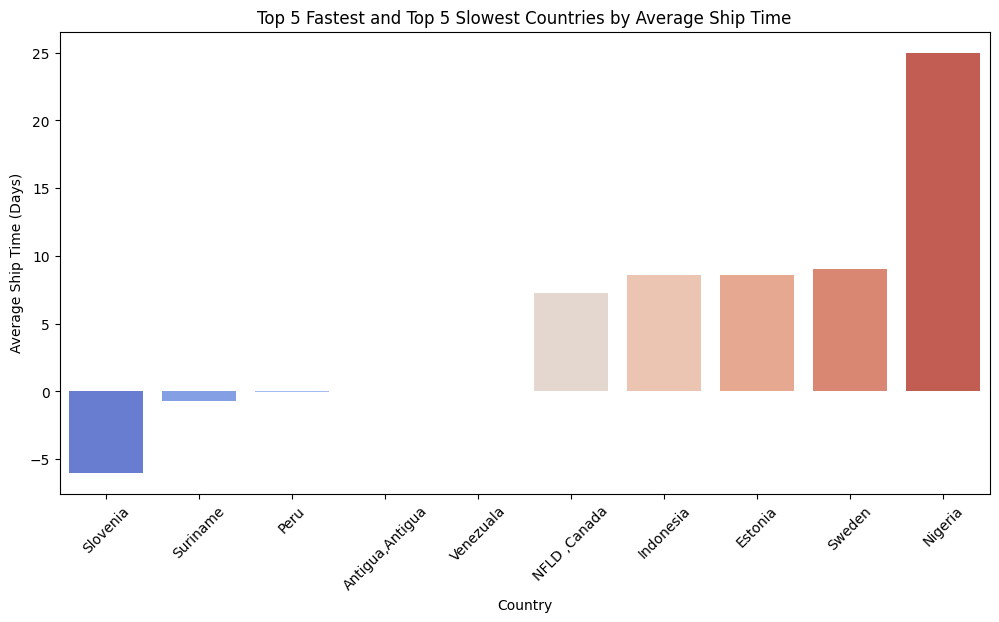

In [17]:
# Create a new DataFrame that holds the average ship time for each country
avg_ship_time_df = merged_df.groupby('foreign_port_of_lading_country')['ship_time'].mean().reset_index()

# Sort the DataFrame based on the average ship time
avg_ship_time_df = avg_ship_time_df.sort_values(by='ship_time')

# Take the top 5 fastest and top 5 slowest countries
top_5_fastest = avg_ship_time_df.head(5)
top_5_slowest = avg_ship_time_df.tail(5)

# Combine them into a single DataFrame
top_and_bottom_5 = pd.concat([top_5_fastest, top_5_slowest])

# Create the Seaborn barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='foreign_port_of_lading_country', y='ship_time', data=top_and_bottom_5, palette='coolwarm')
plt.title('Top 5 Fastest and Top 5 Slowest Countries by Average Ship Time')
plt.xticks(rotation=45)
plt.ylabel('Average Ship Time (Days)')
plt.xlabel('Country')
plt.show()

In [15]:
# Group by country and count the number of shipments
country_shipment_counts = merged_df['foreign_port_of_lading_country'].value_counts().reset_index()
country_shipment_counts.columns = ['Country', 'Number_of_Shipments']

# Take the top 10 countries with the most shipments
top_10_countries = country_shipment_counts.nlargest(10, 'Number_of_Shipments')


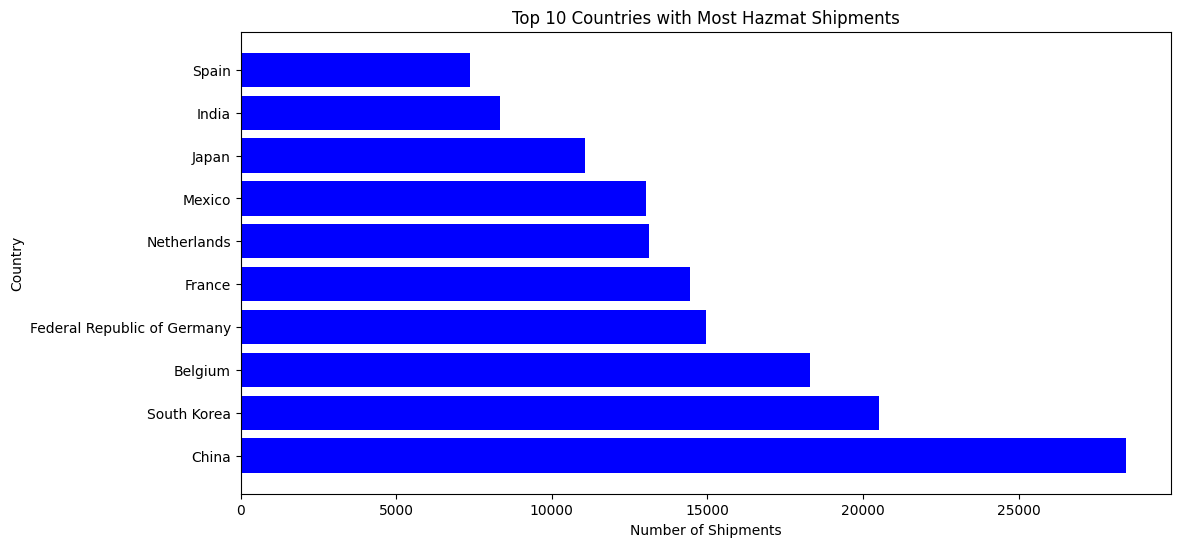

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(top_10_countries['Country'], top_10_countries['Number_of_Shipments'], color='blue')
plt.xlabel('Number of Shipments')
plt.ylabel('Country')
plt.title('Top 10 Countries with Most Hazmat Shipments')
plt.show()
